In [87]:
input_file = '../graph/bitcoin-sorted.edgelist'

In [88]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import graphviz as gv

mpl.rcParams['figure.figsize'] = [18.5, 10.5]

In [89]:
df = pd.read_csv(input_file, sep=' ', header=0)
df.columns = ['X', 'Y']
num_samples = df['X'].size
num_samples

35590

In [90]:
# Group the elements by count
counts = df.groupby('X').count()
counts.size

4814

In [91]:
np.mean(counts)

Y    7.39302
dtype: float64

In [92]:
np.median(counts)

2.0

Plot distribution of node degrees (number of neighbors per node)

,Count
Id,
1,214
2,45
4,63
5,3
6,39
7,232
8,1
9,1
10,8


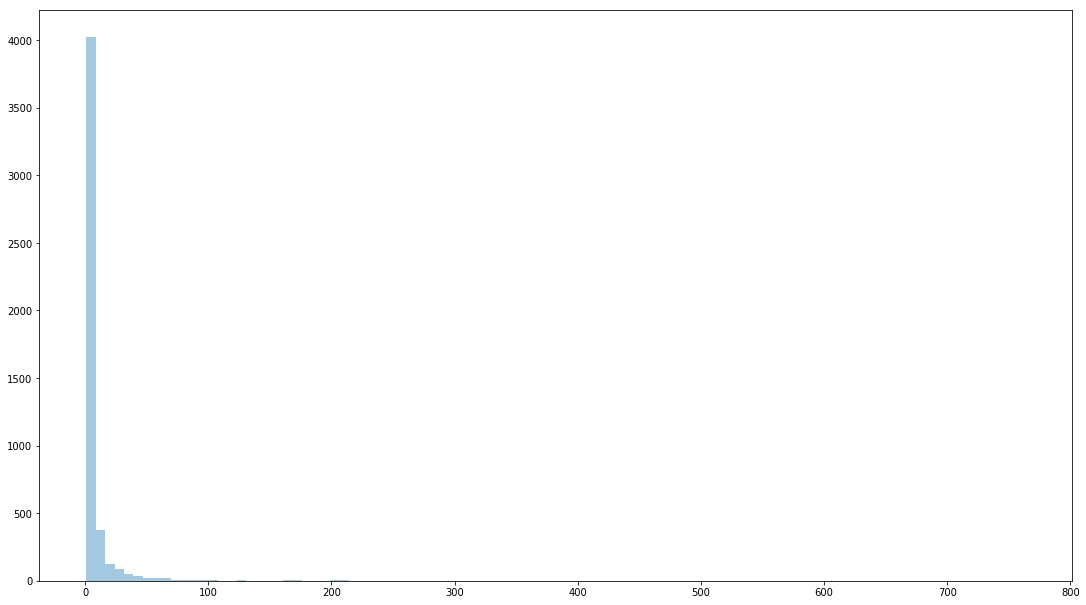

In [122]:
sns.distplot(counts, kde=False, bins=100)
counts.index.rename('Id', inplace=True)
counts.columns = ['Count']
counts

In [116]:
percentiles = pd.DataFrame(counts.loc[:, 'Count'] / num_samples)

In [117]:
cumsum = percentiles.cumsum()

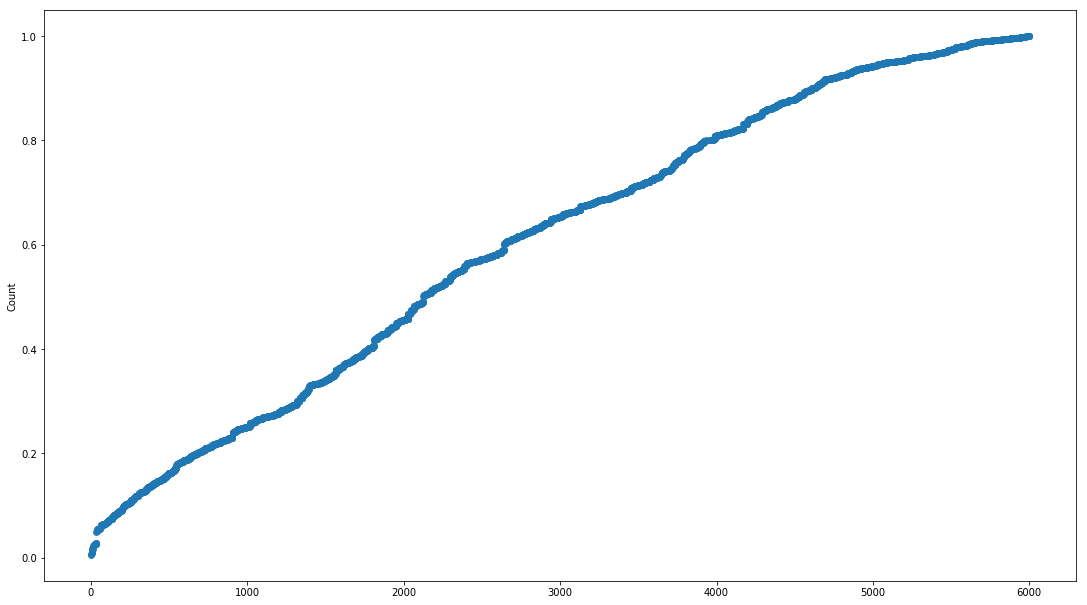

In [119]:
sns.regplot(cumsum.index.values, cumsum['Count'], fit_reg=False)

In [124]:
# Define available embeddings
emb_filenames = ['../emb/bitcoin-2dims-10walks.emb',
             '../emb/bitcoin-2dims-20walks.emb',
             '../emb/bitcoin-2dims-30walks.emb',
             '../emb/bitcoin-2dims-40walks.emb',
             '../emb/bitcoin-2dims-50walks.emb',
             '../emb/bitcoin-2dims-60walks.emb',
             '../emb/bitcoin-2dims-70walks.emb']

# Load embeddings
embeddings = []
for filename in emb_filenames:
    embedding = pd.read_csv(filename, sep=' ')
    embedding.index.rename('Id', inplace=True)
    embedding.columns = ['X', 'Y']
    embeddings.append(embedding)

In [127]:
# Rename and join

counts
dfs_joined = []
for df in embeddings:
    df_joined = df.join(counts)
    df_joined['Count'].fillna(0, inplace=True)
    df_joined.sort_values(by=['Count'], inplace=True)
    dfs_joined.append(df_joined)

[             X         Y  Count
 Id                             
 1772 -4.760221 -0.843556    0.0
 5354 -3.101297 -0.319230    0.0
 5400 -3.036288 -0.323364    0.0
 1501 -3.369495 -0.413417    0.0
 5340 -3.042526 -0.305356    0.0
 5082 -3.128857 -0.302898    0.0
 5326 -3.057171 -0.311414    0.0
 5807 -0.090992 -1.180402    0.0
 5295 -3.072545 -0.302623    0.0
 5387 -3.044943 -0.311397    0.0
 5530 -2.996990 -0.299158    0.0
 4072 -3.122819 -0.305184    0.0
 4309 -3.100318 -0.313690    0.0
 5174 -2.988168 -0.280906    0.0
 5786 -3.127495 -0.317104    0.0
 5757 -3.341951 -0.352417    0.0
 5718 -0.149552 -1.120280    0.0
 5378 -0.156458 -1.128778    0.0
 25   -0.555636 -0.694395    0.0
 5705 -3.285082 -0.375564    0.0
 5645 -3.273199 -0.352561    0.0
 5467 -3.074523 -0.295359    0.0
 5324 -3.081083 -0.311947    0.0
 2532 -4.886487 -0.844333    0.0
 1705 -3.106328 -0.345615    0.0
 5561 -3.284994 -0.350090    0.0
 5150 -0.140170 -1.108173    0.0
 5386 -3.118850 -0.309752    0.0
 5223 -3.0

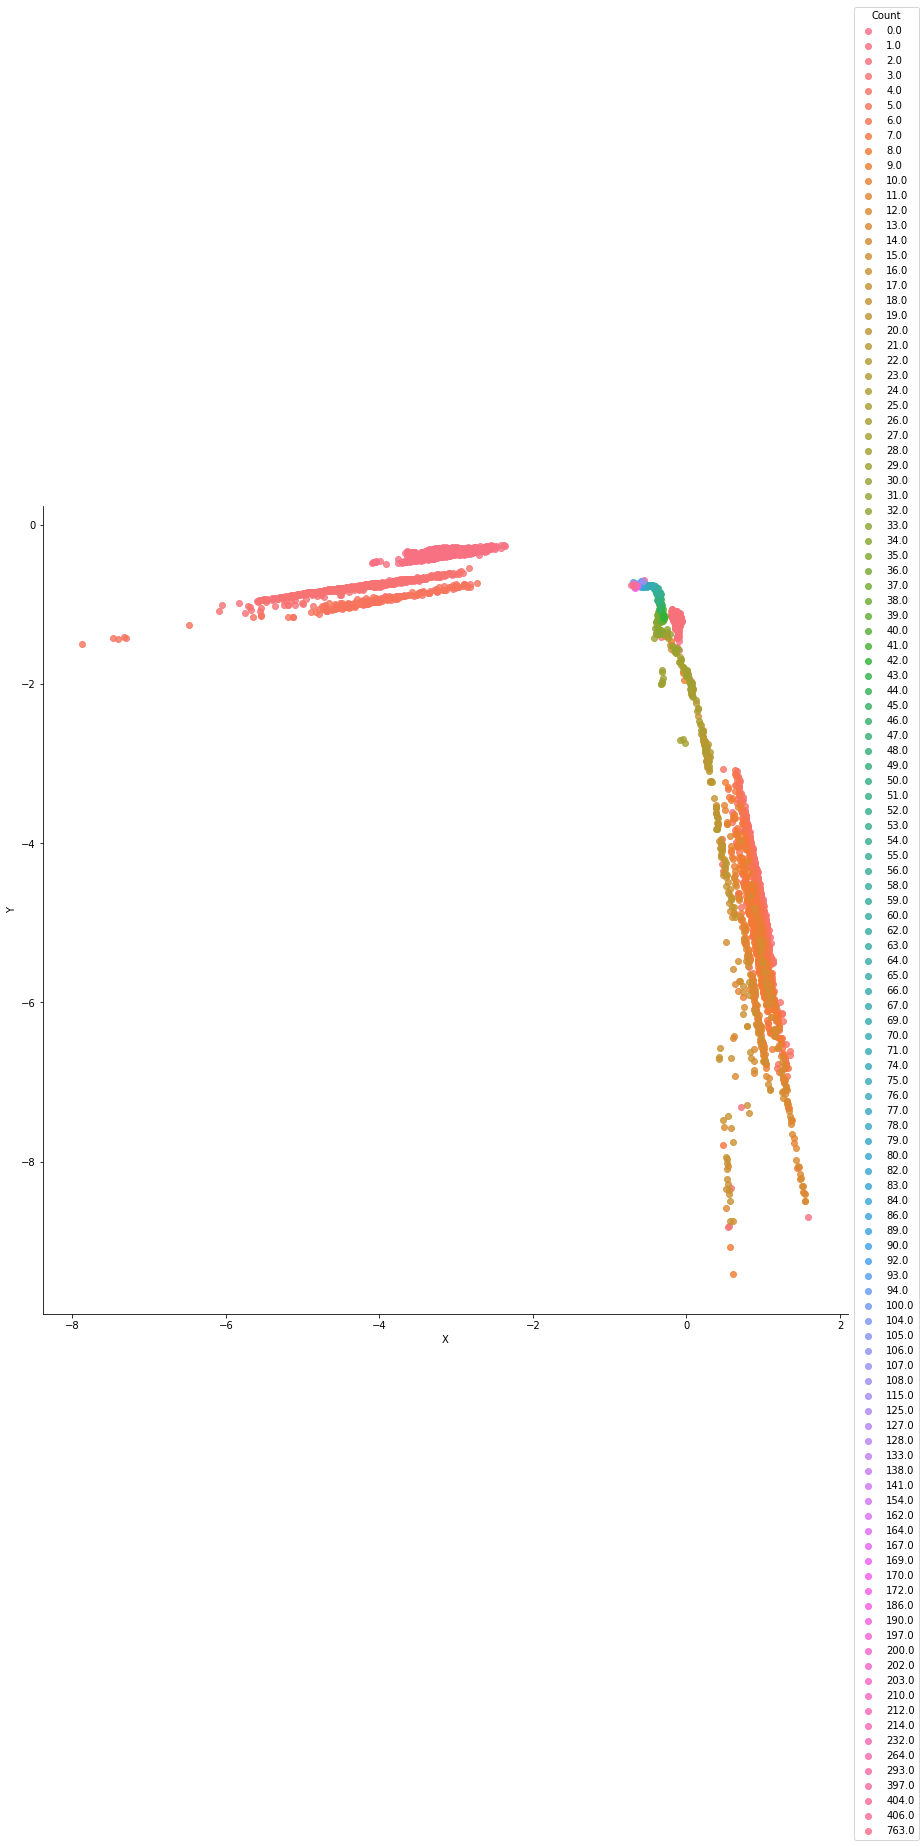

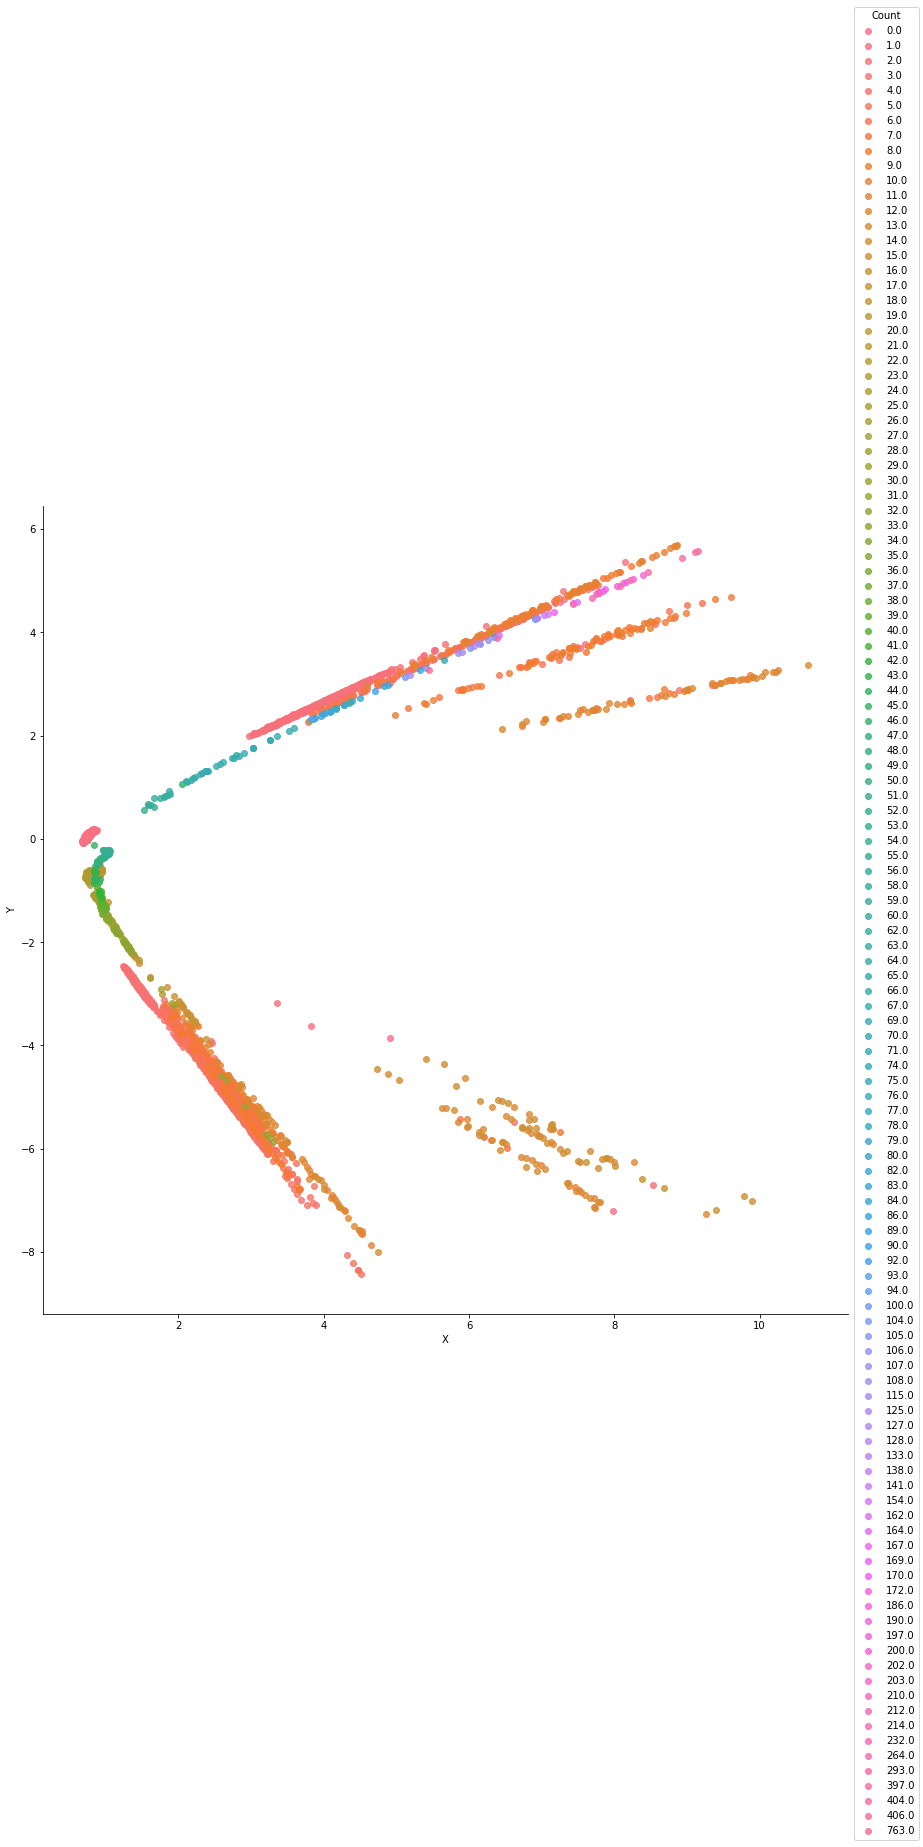

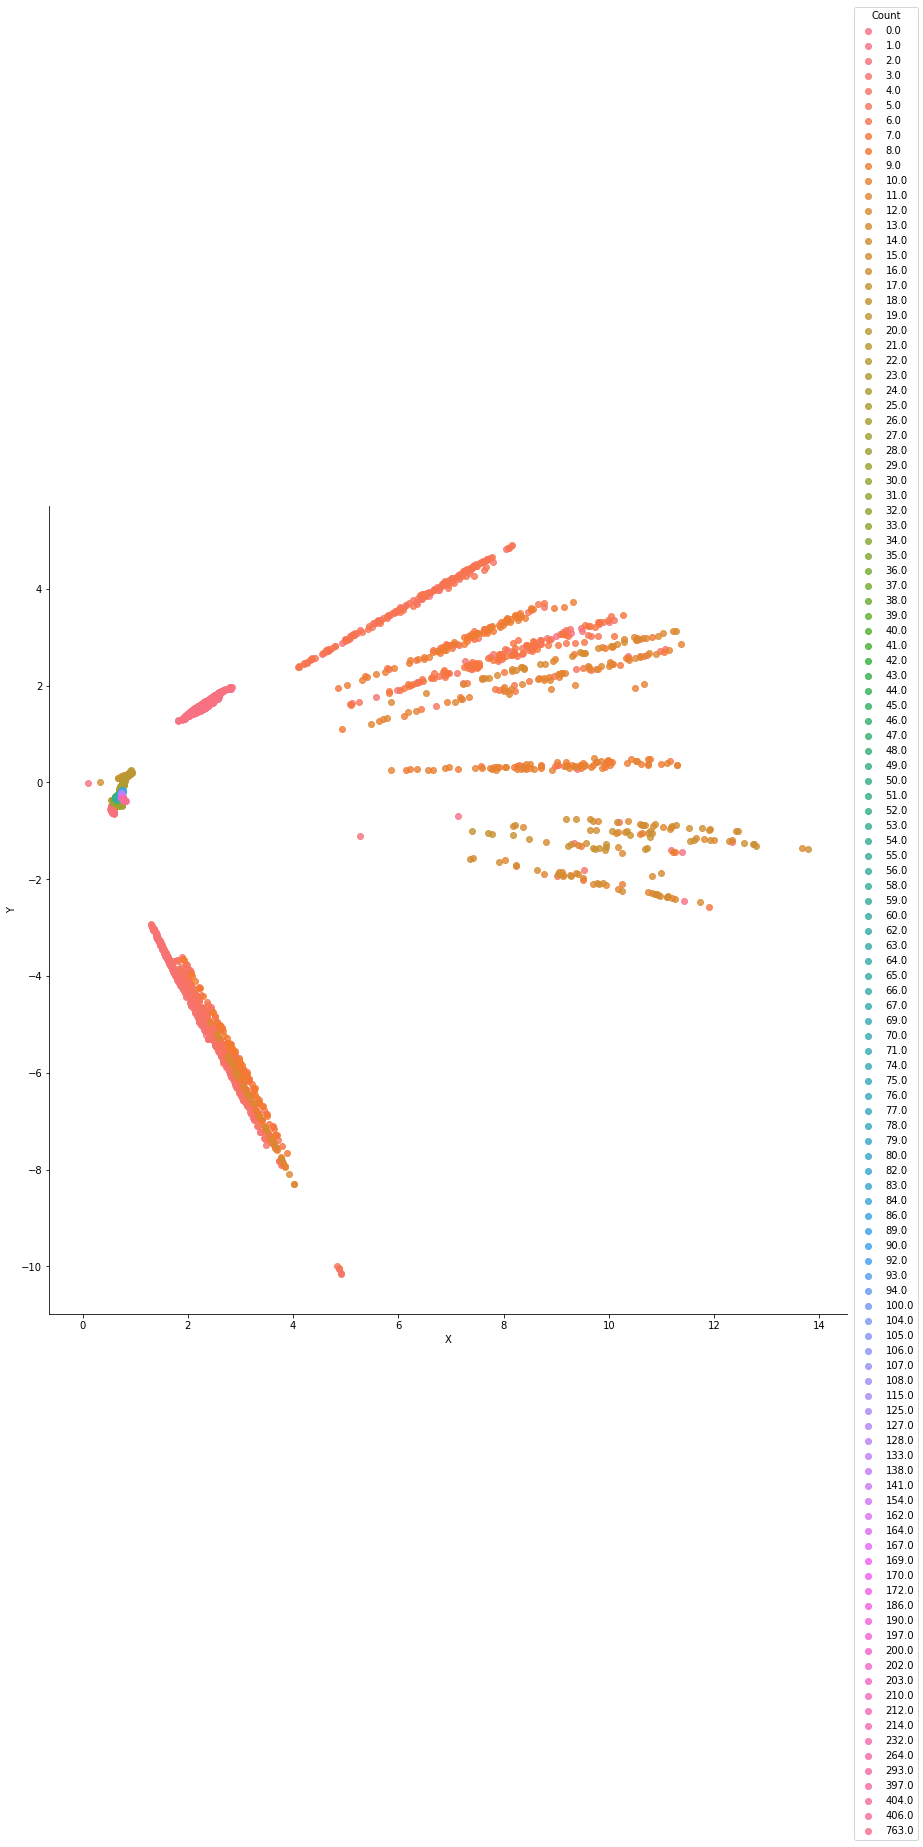

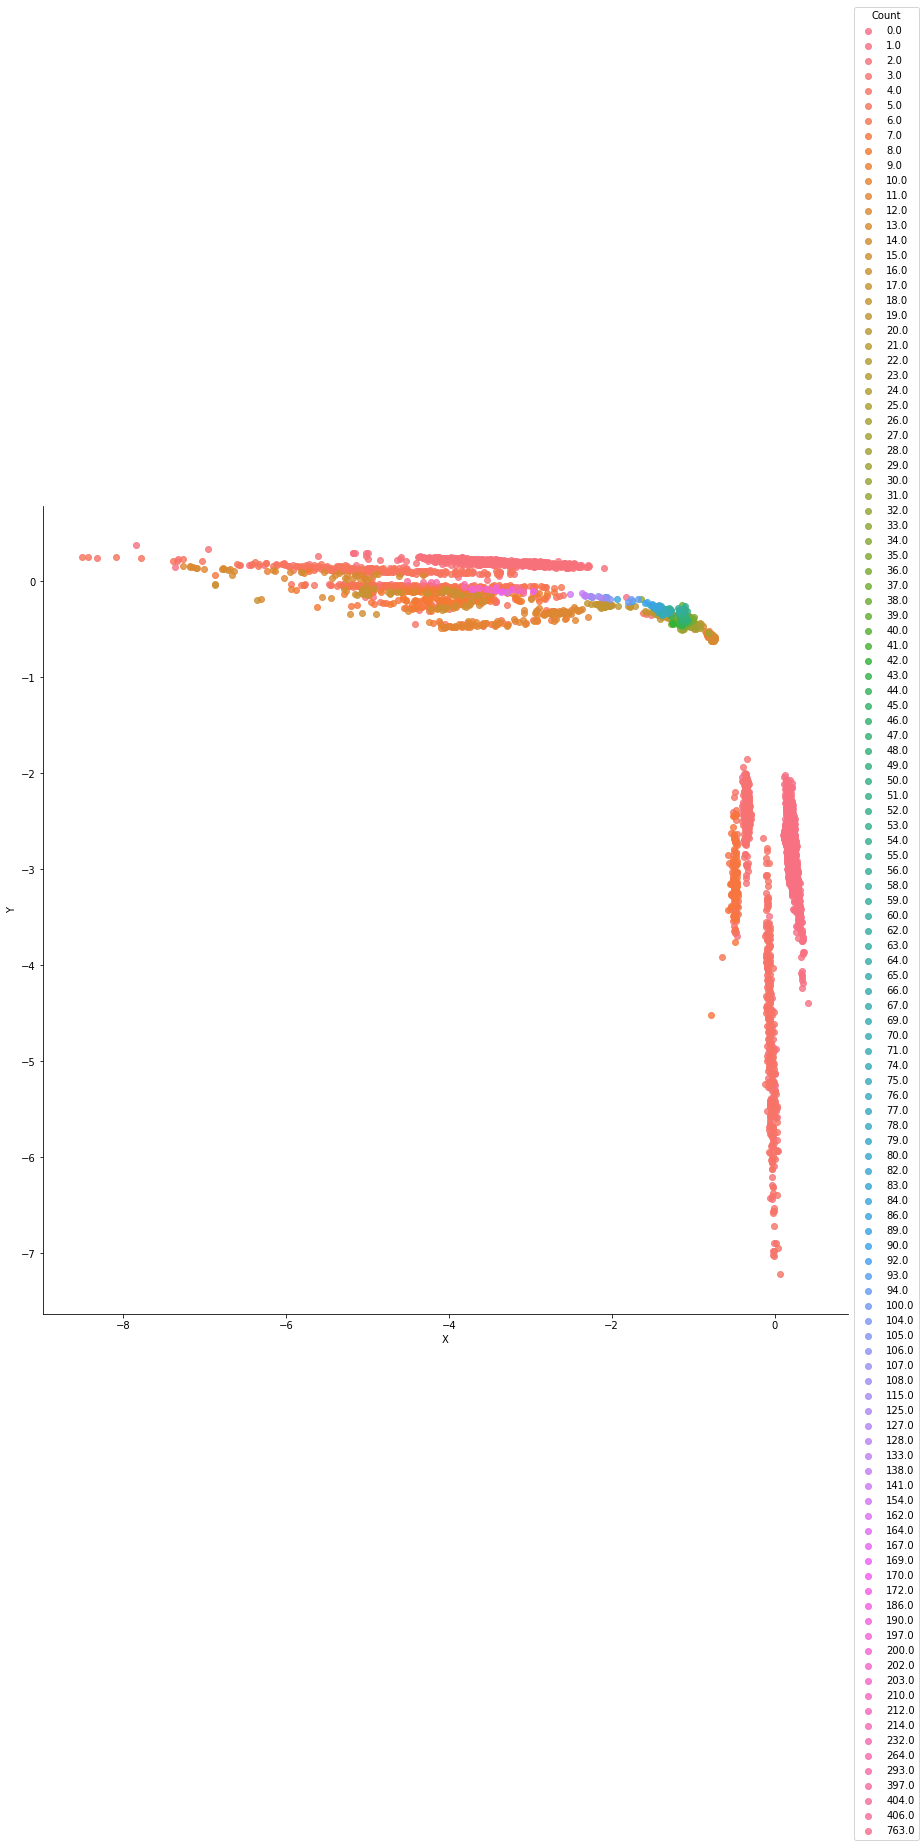

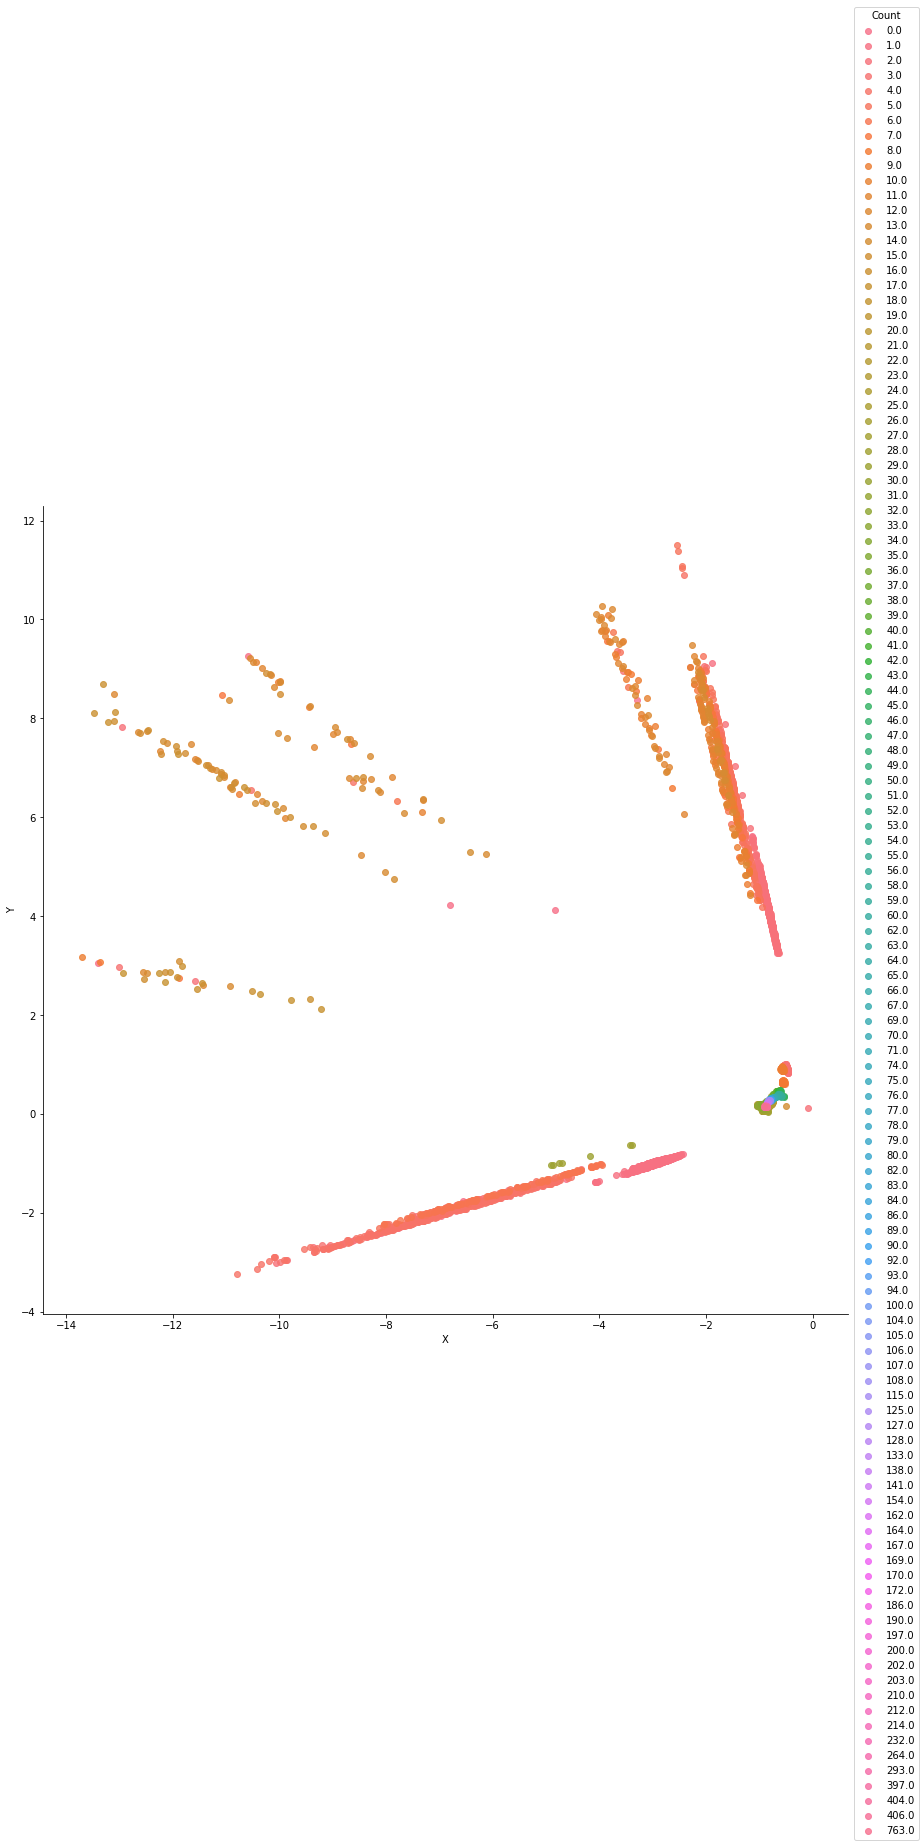

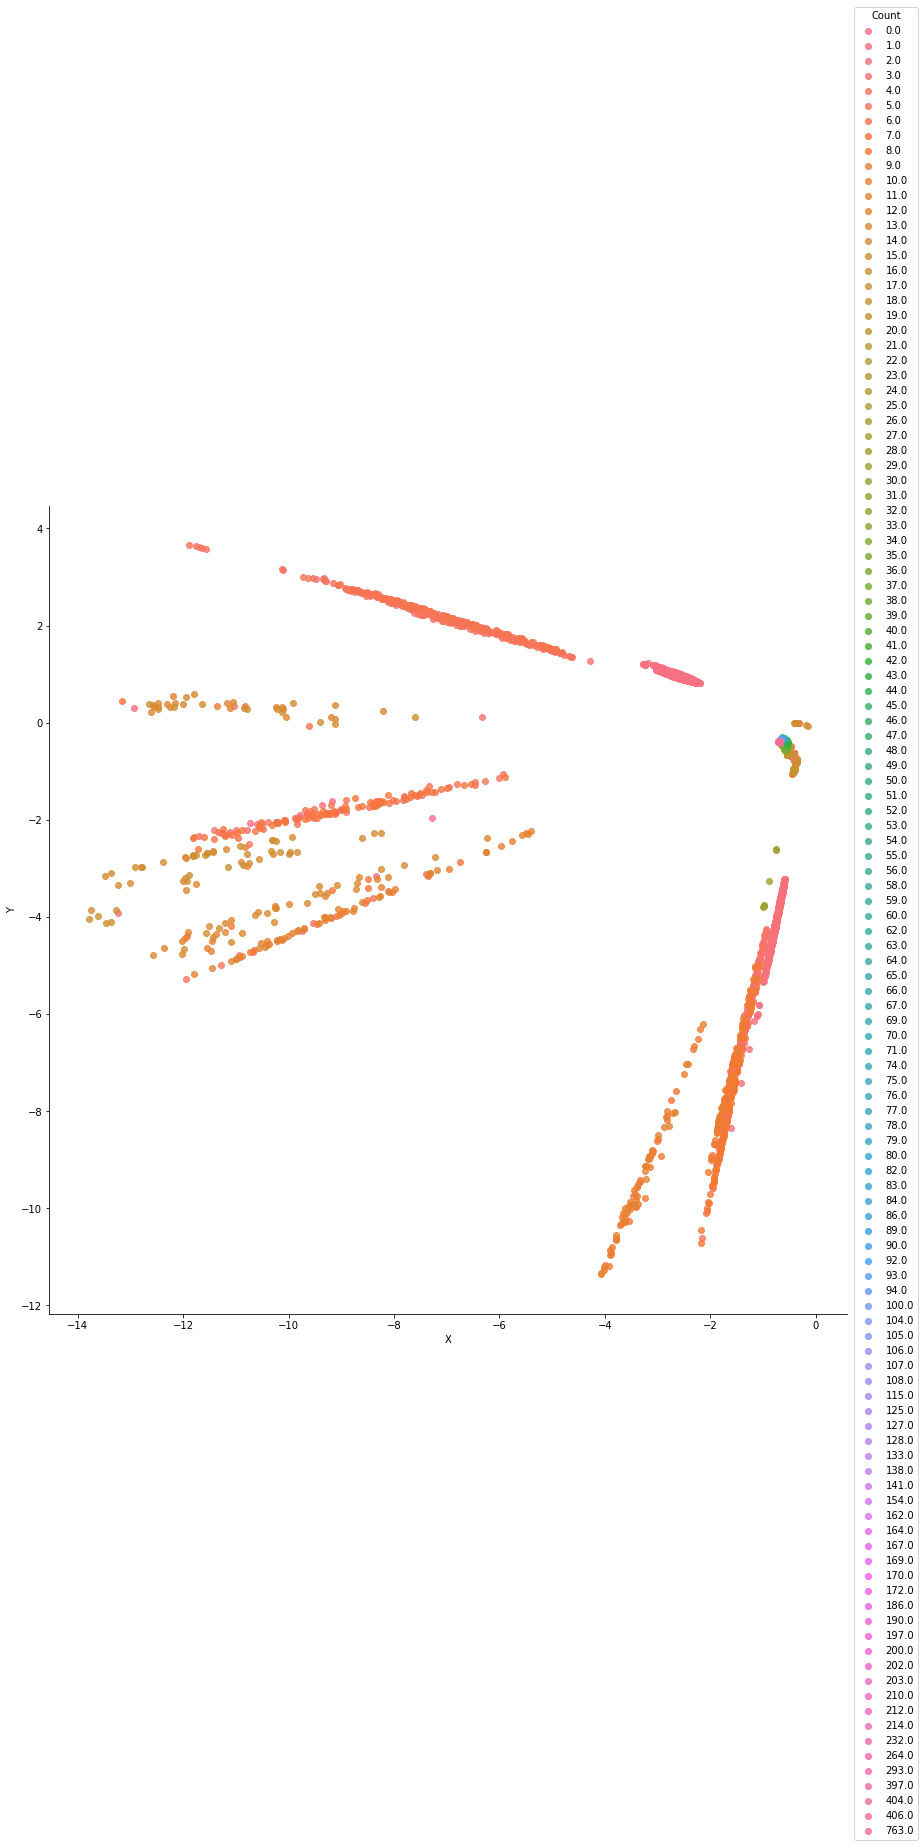

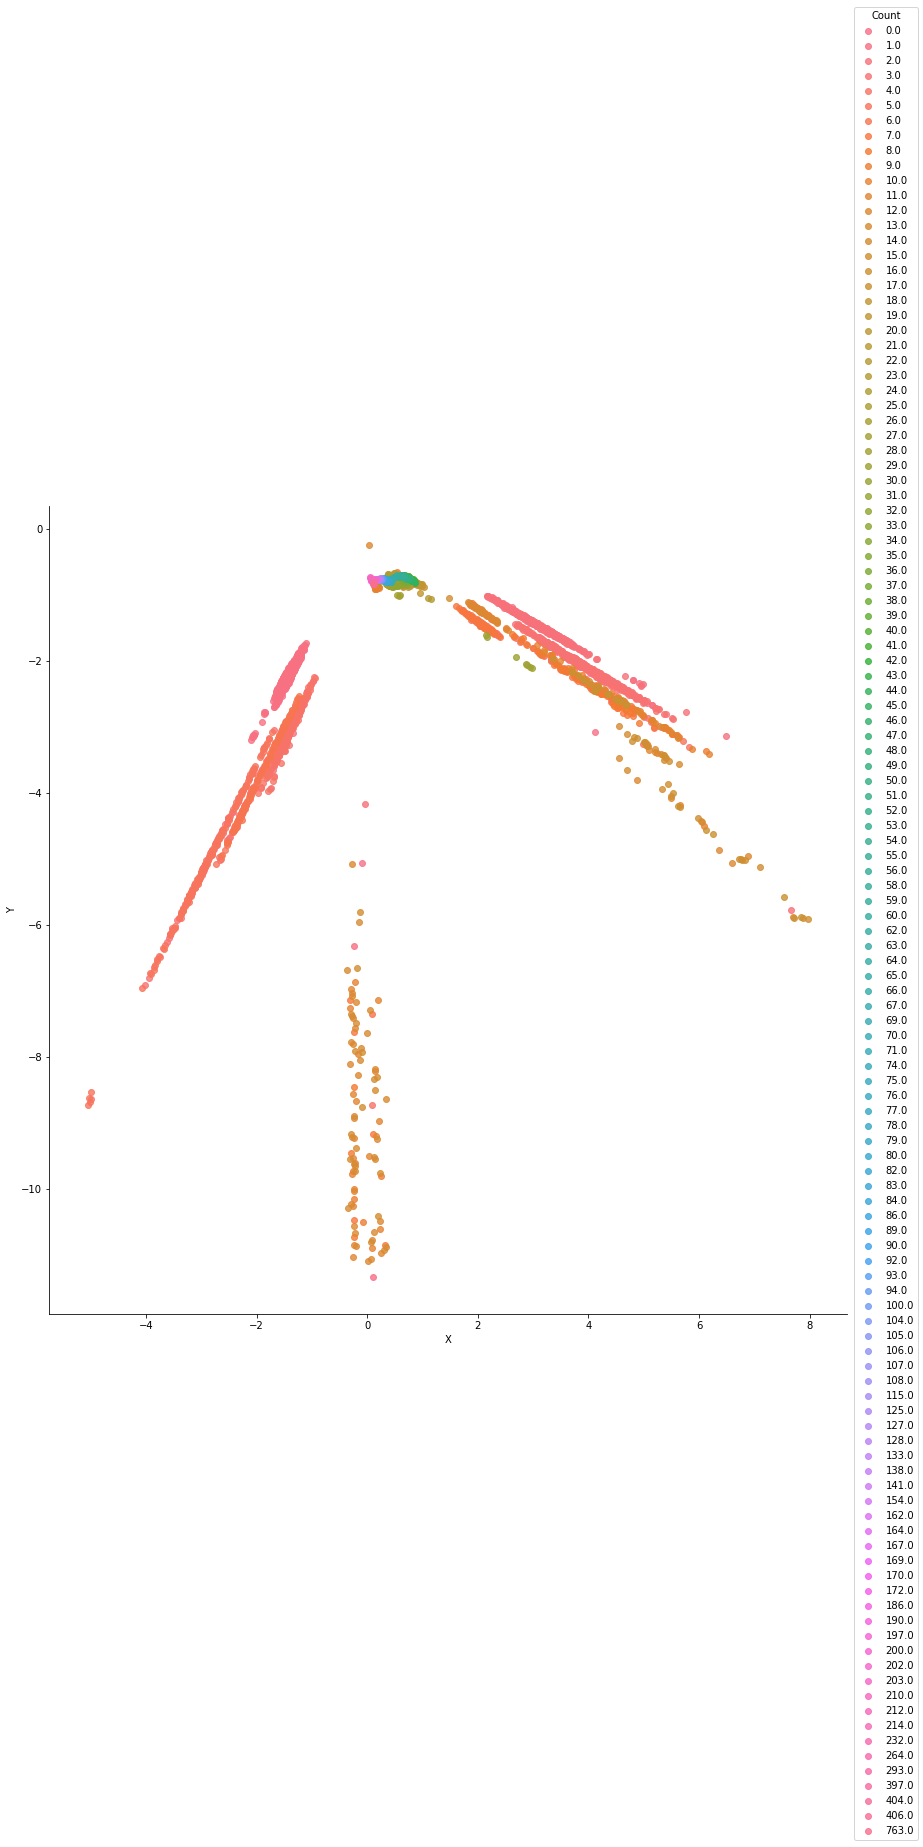

In [132]:
for df in dfs_joined:
    sns.lmplot(data=df, x='X', y='Y', hue='Count', fit_reg=False, size=12, aspect=1)